<a href="https://colab.research.google.com/github/NeeteshDadwariya/CS6375/blob/main/assignments/assignment1/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [36]:
#Using data from the hosted location
df = pd.read_excel("https://archive.org/download/concrete-data/Concrete_Data.xlsx")
df.head()

,cement_component,blast_furnace_slag,fly_ash_component,water_component,superplasticizer,coarse_agg_component,fine_agg_component,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [37]:
df.describe()

,cement_component,blast_furnace_slag,fly_ash_component,water_component,superplasticizer,coarse_agg_component,fine_agg_component,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


Thus, we see that the 'cement_component' feature is contributing the most towards the output variable 'concrete_compressive_strength'.

In [38]:
#Preprocessing the data set - checking null values
df.isnull().sum()

cement_component                 0
blast_furnace_slag               0
fly_ash_component                0
water_component                  0
superplasticizer                 0
coarse_agg_component             0
fine_agg_component               0
age                              0
concrete_compressive_strength    0
dtype: int64

In [39]:
#Preprocessing the data set - checking NaN values
df.isna().sum()

cement_component                 0
blast_furnace_slag               0
fly_ash_component                0
water_component                  0
superplasticizer                 0
coarse_agg_component             0
fine_agg_component               0
age                              0
concrete_compressive_strength    0
dtype: int64

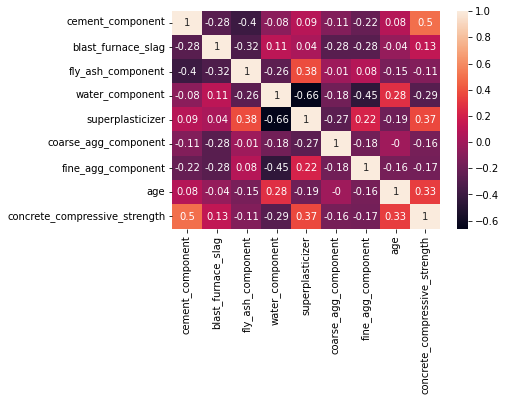

In [40]:
#Constructing heatmap on the dataset
correlation_matrix = df.corr().round(2)
sb.heatmap(data=correlation_matrix, annot=True)

In [41]:
class LinearRegression():

  def __init__(self):
    self.theta = [];
    pass

  #Pre process the data to avoid null and duplicate values
  def pre_processing(self, df):
    df = df.dropna()
    df = df.drop_duplicates()
    return df

  #Split the target variable from the data
  def split_X_and_y(self, df):
    no_rows, no_cols = df.shape[0], df.shape[1]
    X =  df.iloc[:, 0:(no_cols -1)]
    y = df.iloc[:, no_cols-1]
    return X,y

  #Normalizing the data 
  def scale_data(self, df):
    return (df - df.mean()) / df.std()

  #Splitting train and test data
  def split_train_test(self, X, y):
    return train_test_split(X, y, test_size = 0.2, random_state=5)

  #Appending 1's to the first column of X to add W0 intercept term in linear regression.
  def get_vectorX(self, X):
    return np.c_[np.ones((len(X),1)), X]

  #Randomly generate the intial weights
  def get_initial_weights(self, X):
    return np.random.rand(X.shape[1] + 1, 1).ravel()

  #Return the multivariate gradient for the given X, y with provided intial weights.
  def multivariate_gradient(self, X, y, theta):
    return 2/len(X)*X.T.dot(X.dot(theta) - y.ravel())

  #Fit the model with within the given epochs and learning rate.
  def fit_with_grad_desc(self, X, y, epochs, rate):
      self.theta = self.get_initial_weights(X)
      vectorX = self.get_vectorX(X)
      costs = []
      m = len(X)
      for i in range(epochs):
        gradient = self.multivariate_gradient(vectorX, y, self.theta)
        self.theta -= rate*gradient
        y_pred = vectorX.dot(self.theta)
        cost = 1/(2*m)*(y - y_pred)**2
        costs.append(cost.sum())

      return costs, self.theta

  #Predicting on the test dataset    
  def predict(self, X_test):
    n = X_test.shape[0]
    vector_X_test = self.get_vectorX(X_test)
    return vector_X_test.dot(self.theta)

  #Evaluating the model performance
  def evaluate(self, y_test, y_pred):
    mse = 1/2*((y_test - y_pred)**2).mean()
    return mse


Create the model instance

In [42]:
model = LinearRegression()

## Data cleaning and preprocessing

In [43]:
df = model.pre_processing(df)
df.head()

,cement_component,blast_furnace_slag,fly_ash_component,water_component,superplasticizer,coarse_agg_component,fine_agg_component,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Here we do not have any categorical variables in the data, so we do not need to convert it.

In [44]:
X, y = model.split_X_and_y(df)

## Scaling the data

We would want to scale the data to normalize the deviations.

In [45]:
X = model.scale_data(X)

In [46]:
X_train, X_test, y_train, y_test = model.split_train_test(X, y)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (804, 8)
y_train shape:  (804,)
X_test shape:  (201, 8)
y_test shape:  (201,)


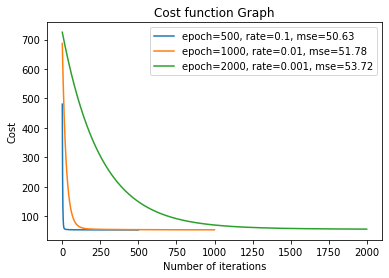

In [47]:
#Try over different combinations of learning rate and iterations.
tuning_params = [(500, 0.1), (1000, 0.01), (2000, 0.001)]
model_params = []
theta_for_min_cost = None
for i,tup in enumerate(tuning_params):
  no_of_iterations = tup[0]
  learning_rate = tup[1]
  costs, theta = model.fit_with_grad_desc(X_train, y_train, no_of_iterations, learning_rate)

  #We'll run over the current learning rate and iteration combination, and see of it gives the best MSE.
  y_pred = model.predict(X_test)
  mse = model.evaluate(y_test, y_pred)

  model_params.append({
    'no_of_iterations': no_of_iterations,
    'learning_rate': learning_rate,
    'costs': costs,
    'theta': theta,
    'mse': mse
  })

  label_str = 'epoch=' + str(no_of_iterations) + ", rate=" + str(learning_rate)+ ", mse=" + "{:.2f}".format(mse)
  plt.plot(costs, label = label_str)

plt.title('Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()


We'll now chosse the model with least MSE.


In [48]:
learning_rate = 0.1
no_of_iterations = 500
costs, theta = model.fit_with_grad_desc(X_train, y_train, no_of_iterations, learning_rate)

In [49]:
print("Minimum cost:", min(costs))
print("Final weights:", theta)
print(theta.shape)

Minimum cost: 53.12372739198001
Final weights: [35.2582463  11.71494864  8.00622884  5.14360013 -3.89470808  1.24091712
  0.38522031  0.56241769  7.04397683]
(9,)


Text(0, 0.5, 'Cost')

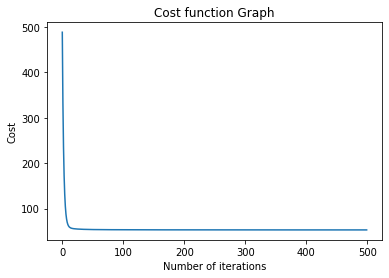

In [50]:
plt.plot(costs)
plt.title('Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')

## Predicting on test dataset

In [51]:
y_pred = model.predict(X_test)
print(y_test)

619    27.627303
686    14.143911
293    48.670111
368    56.633559
11     28.021684
         ...    
487    46.684420
518    23.245191
887    40.679084
894    29.723310
877    31.419421
Name: concrete_compressive_strength, Length: 201, dtype: float64


## Model Accuracy

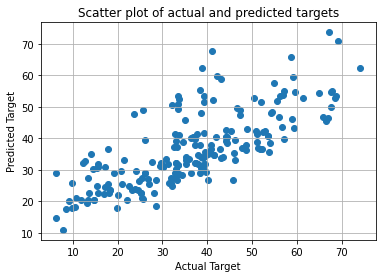

In [52]:
plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Scatter plot of actual and predicted targets')
plt.show()

In [53]:
mse = model.evaluate(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 50.62584327869689


In [54]:
from sklearn.metrics import r2_score
print("Coefficient of determination (R2):", r2_score(y_test, y_pred))

Coefficient of determination (R2): 0.5711000631701372
